In [440]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [441]:
# Importo TRAIN

df_train = pd.read_csv("Data/train.csv")

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [442]:
df_train = df_train.drop(columns=["PassengerId", "Name"])

In [443]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [444]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [445]:
df_train["Age"].fillna(28)
df_train["FoodCourt"].fillna(224)
df_train["ShoppingMall"].fillna(173)
df_train["Spa"].fillna(311)
df_train["VRDeck"].fillna(304)

0          0.0
1         44.0
2         49.0
3        193.0
4          2.0
         ...  
8688      74.0
8689       0.0
8690       0.0
8691    3235.0
8692      12.0
Name: VRDeck, Length: 8693, dtype: float64

In [446]:
df_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [447]:
# Aplico Level Encoder a la columna HomePlanet

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_train['HomePlanet'] = le.fit_transform(df_train.HomePlanet.values)


In [448]:
# Aplico Level Encoder a la columna Destination

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_train['Destination'] = le.fit_transform(df_train.Destination.values)

In [449]:
# Aplico Level Encoder a la columna VIP

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_train['VIP'] = le.fit_transform(df_train.VIP.values)

In [450]:
# Aplico Level Encoder a la columna CryoSleep

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_train['CryoSleep'] = le.fit_transform(df_train.CryoSleep.values)

In [451]:
# Aplico Level Encoder a la columna Cabin

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_train['Cabin'] = le.fit_transform(df_train.Cabin.values)

In [452]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Cabin         8693 non-null   int64  
 3   Destination   8693 non-null   int64  
 4   Age           8514 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(5)
memory usage: 755.7 KB


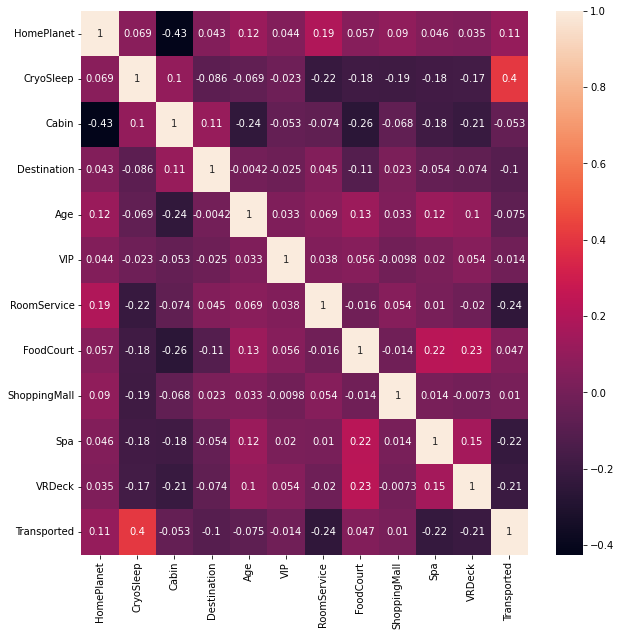

In [453]:
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(df_train.corr(), annot=True);

In [454]:
# Columns as Features
X = df_train.drop(columns="Transported")  

X

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0


In [455]:
y = df_train["Transported"]

y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [456]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


In [457]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (8693, 11)
Train features shape: (6085, 11)
Train target shape: (6085,)
Test features shape: (2608, 11)
Test target shape: (2608,)


In [458]:
import xgboost

xgb_class = xgboost.XGBClassifier(random_state=42)
xgb_class.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [459]:
xgb_class.score(X_train, y_train)

0.9322925225965489

In [476]:
xgb_class.score(X_test, y_test)

0.7852760736196319

---
---
---
# TEST
---
---
---

In [496]:
# Importo TRAIN

df_test = pd.read_csv("Data/test.csv")

df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [497]:
my_submission = df_test.copy()[["PassengerId"]]
my_submission

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [498]:
df_test = df_test.drop(columns=["PassengerId", "Name"])

In [499]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
dtypes: float64(6), object(5)
memory usage: 367.7+ KB


In [500]:
# Aplico Level Encoder a la columna Destination


le = preprocessing.LabelEncoder()
df_test['Destination'] = le.fit_transform(df_test.Destination.values)

In [501]:
# Aplico Level Encoder a la columna VIP


le = preprocessing.LabelEncoder()
df_test['VIP'] = le.fit_transform(df_test.VIP.values)

In [502]:
# Aplico Level Encoder a la columna CryoSleep


le = preprocessing.LabelEncoder()
df_test['CryoSleep'] = le.fit_transform(df_test.CryoSleep.values)

In [503]:
# Aplico Level Encoder a la columna Cabin


le = preprocessing.LabelEncoder()
df_test['Cabin'] = le.fit_transform(df_test.Cabin.values)

In [504]:
# Aplico Level Encoder a la columna Cabin

le = preprocessing.LabelEncoder()
df_test['HomePlanet'] = le.fit_transform(df_test.HomePlanet.values)

In [505]:
xgb_class.predict(df_test)

array([0, 0, 1, ..., 1, 1, 1])

In [506]:
my_submission["Transported"] = xgb_class.predict(df_test)

In [507]:
my_submission

,PassengerId,Transported
0,0013_01,0
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [508]:
my_submission["Transported"] = my_submission["Transported"].astype(bool)

In [509]:
my_submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [510]:
my_submission.to_csv("My_submission_yeah.csv", index = False)